# **IRIS FLOWER CLASSIFICATION**



# 1. DATA UNDERSTANDING

In [ ]:
# Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
df=pd.read_csv("Iris.csv") # Read the Dataset

In [ ]:
df.head() # First 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail() # Last 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.shape # Shape of the dataset

(150, 6)

In [ ]:
df.columns # Columns of the dataset

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.info() # Basic info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe() # Statistical info about dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# 2. DATA CLEANING

In [ ]:
df.isnull().sum() # Check null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.duplicated().sum() # Check duplicate values

0

In [ ]:
# Drop 'ID' column as it has no role in classification
df.drop(columns='Id', inplace=True)
print(df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


# 3. EXPLORATORY DATA ANALYSIS

In [ ]:
# Frequency table for Species
species_count=df['Species'].value_counts()
print(species_count)

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


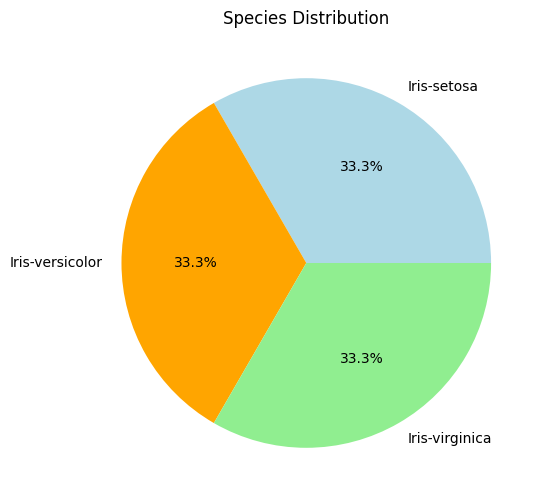

In [ ]:
# Univariate analysis with Pie Chart
species_count.plot.pie(
autopct='%1.1f%%',figsize=(6, 6),
colors=['lightblue', 'orange', 'lightgreen'],title='Species Distribution')
plt.ylabel('')
plt.show()

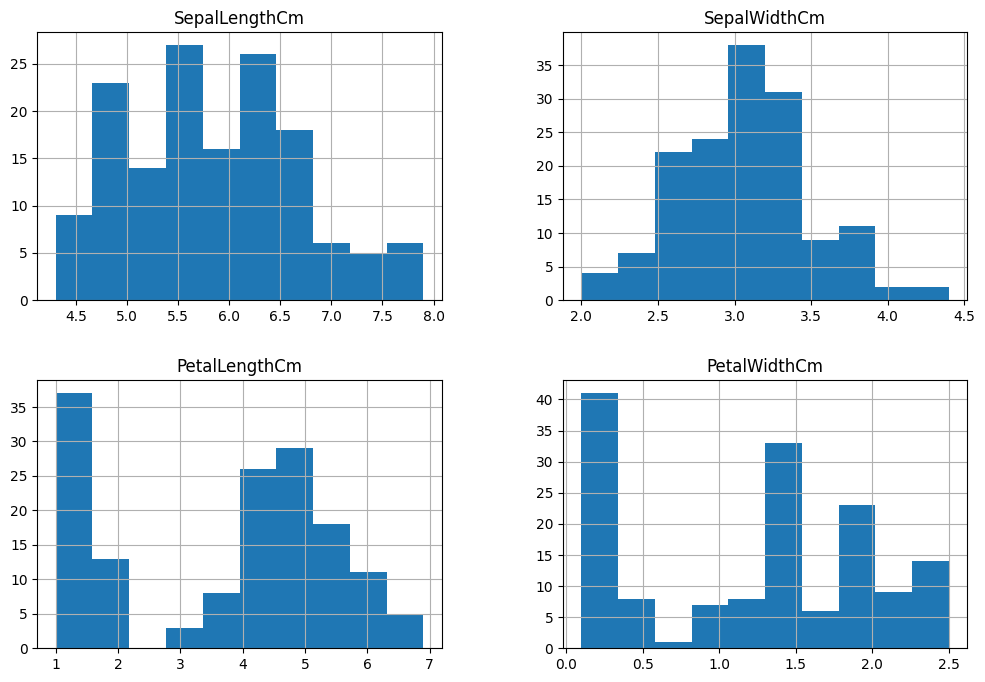

In [ ]:
# Histograms for all numerical columns
df.hist(bins=10, figsize=(12, 8))
plt.show()

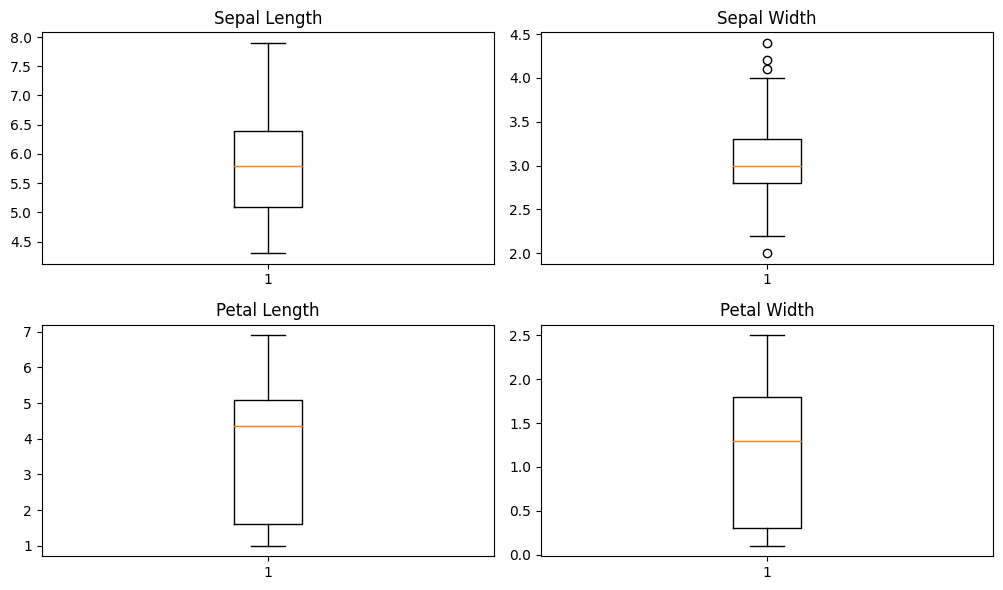

In [ ]:
# Box plot for all numerical column
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes[0, 0].boxplot(df['SepalLengthCm'])
axes[0, 0].set_title("Sepal Length")
axes[0, 1].boxplot(df['SepalWidthCm'])
axes[0, 1].set_title("Sepal Width")
axes[1, 0].boxplot(df['PetalLengthCm'])
axes[1, 0].set_title("Petal Length")
axes[1, 1].boxplot(df['PetalWidthCm'])
axes[1, 1].set_title("Petal Width")
plt.tight_layout()
plt.show()

<ipython-input-56-b4670916d679>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Species',y='PetalLengthCm', data=df, palette='Greens')
<ipython-input-56-b4670916d679>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Species',y='PetalWidthCm', data=df, palette='Purples')
<ipython-input-56-b4670916d679>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Species',y='SepalLengthCm', data=df, palette='Blues')
<ipython-input-56-b4670916d679>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be re

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

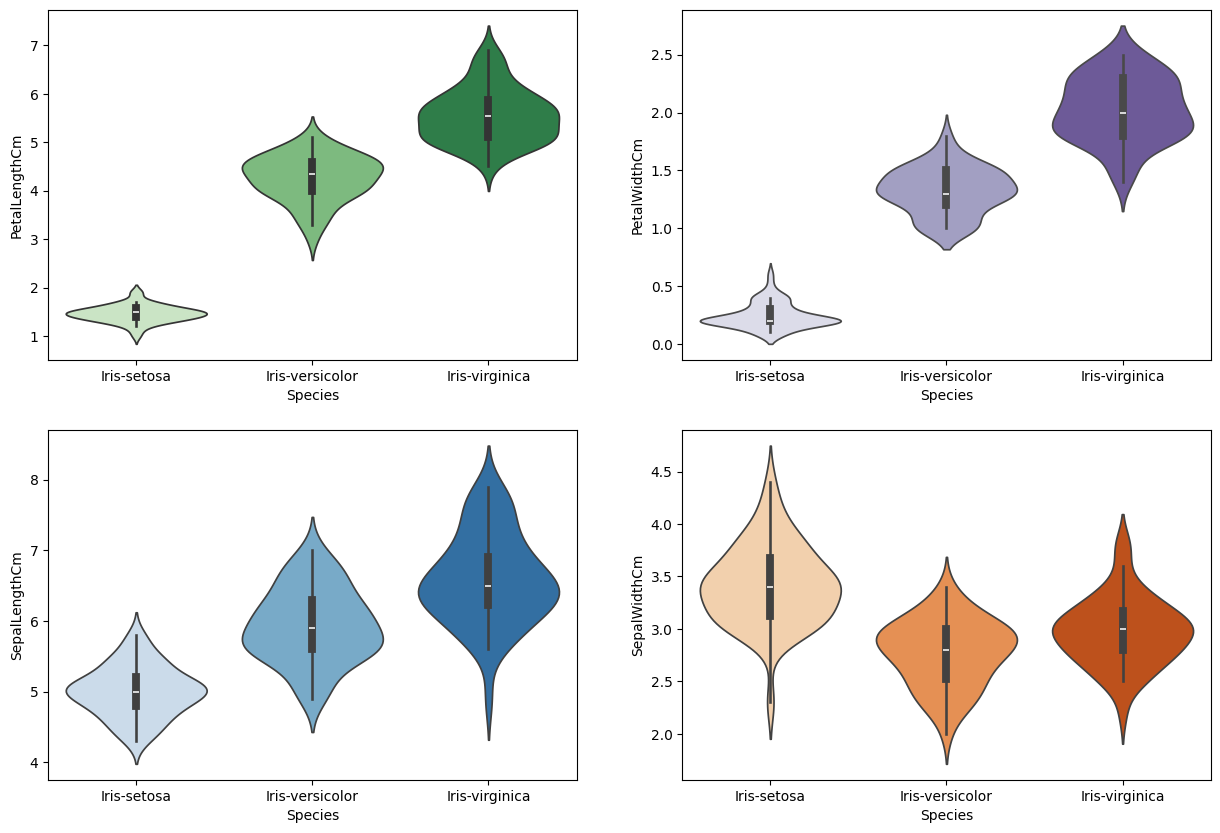

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm', data=df, palette='Greens')
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm', data=df, palette='Purples')
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm', data=df, palette='Blues')
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm', data=df, palette='Oranges')

# 4. MODEL BUILDING

In [ ]:
# Mapping Values
df['Category'] = df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

In [ ]:
# Split the data into training and testing sets
X = df.drop(columns=['Species'])
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-1.02366372, -2.37846268, -0.18295039, -0.29145882, -0.0572036 ],
       [ 0.69517462, -0.10190314,  0.93066067,  0.73721938,  1.1440719 ],
       [ 0.92435306,  0.58106472,  1.04202177,  1.6373128 ,  1.1440719 ],
       [ 0.1222285 , -1.92315077,  0.6522579 ,  0.35146505,  1.1440719 ],
       [ 0.92435306, -1.24018291,  1.09770233,  0.73721938,  1.1440719 ],
       [-0.33612839, -1.24018291,  0.03977182, -0.16287405, -0.0572036 ],
       [ 2.07024529, -0.10190314,  1.26474398,  1.38014325,  1.1440719 ],
       [ 0.46599617,  0.58106472,  0.48521625,  0.48004983, -0.0572036 ],
       [-0.45071761, -1.46783886, -0.01590873, -0.16287405, -0.0572036 ],
       [ 0.46599617, -0.784871  ,  0.59657735,  0.73721938,  1.1440719 ],
       [ 0.46599617, -0.55721505,  0.70793846,  0.35146505,  1.1440719 ],
       [-1.13825295, -1.24018291,  0.37385514,  0.6086346 ,  1.1440719 ],
       [ 0.46599617, -1.24018291,  0.6522579 ,  0.86580415,  1.1440719 ],
       [ 1.26812073,  0.35340877,  0.4

In [ ]:
X_test_scaled

array([[-0.10694994, -0.55721505,  0.70793846,  1.50872803,  1.1440719 ],
       [ 0.1222285 , -1.92315077,  0.09545238, -0.29145882, -0.0572036 ],
       [-0.45071761,  2.6299683 , -1.35224199, -1.32013702, -1.2584791 ],
       [ 1.6118884 , -0.32955909,  1.37610509,  0.73721938,  1.1440719 ],
       [-1.02366372,  0.80872067, -1.29656144, -1.32013702, -1.2584791 ],
       [ 0.46599617,  0.58106472,  1.20906343,  1.6373128 ,  1.1440719 ],
       [-1.02366372,  1.03637663, -1.40792255, -1.19155225, -1.2584791 ],
       [ 0.92435306,  0.12575281,  0.48521625,  0.35146505, -0.0572036 ],
       [ 1.03894229, -0.55721505,  0.5408968 ,  0.22288028, -0.0572036 ],
       [ 0.23681773, -0.55721505,  0.09545238,  0.0942955 , -0.0572036 ],
       [ 0.23681773, -1.01252695,  0.98634122,  0.22288028,  1.1440719 ],
       [ 0.5805854 ,  0.35340877,  0.37385514,  0.35146505, -0.0572036 ],
       [ 0.23681773, -0.55721505,  0.48521625, -0.03428927, -0.0572036 ],
       [ 0.69517462, -0.55721505,  0.4

In [ ]:
y_train

60     Iris-versicolor
116     Iris-virginica
144     Iris-virginica
119     Iris-virginica
108     Iris-virginica
            ...       
9          Iris-setosa
103     Iris-virginica
67     Iris-versicolor
117     Iris-virginica
47         Iris-setosa
Name: Species, Length: 105, dtype: object

In [ ]:
y_test

114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
100     Iris-virginica
40         Iris-setosa
86     Iris-versicolor
76     Iris-versicolor
71     Iris-versicolor
134     Iris-virginica
51     Iris-versicolor
73     Iris-versicolor
54     Iris-versicolor
63     Iris-versicolor
37         Iris-setosa
78     Iris-versicolor
90     Iris-versicolor
45         Iris-setosa
16         Iris-setosa
121     Iris-virginica
66     Iris-versicolor
24         Iris-setosa
8          Iris-setosa
126     Iris-virginica
22         Iris-setosa
44         Iris-setosa
97     Iris-versicolor
93     Iris-versicolor
26         Iris-setosa
137     Iris-virginica
84     Iris-versicolor
27         Iris-setosa
127     Iris-virginica
132     Iris-virginica
59     Iris-versicolor
18         Iris-setosa
83     Iris-versicolor
61     Iris-versicolor
92     Iris-versicolor
112     Iris-virginica
2          Iris-setosa
141     Iris-virginica
43         

#5. MODEL TRAINING

In [ ]:
# 1. Logistic Regression
logistic_model = LogisticRegression(max_iter=200)  # max_iter increased for convergence
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
# Display the accuracies
print("Logistic Regression Accuracy:", accuracy_logistic)

Logistic Regression Accuracy: 1.0


#6. MODEL EVALUATION

In [ ]:
#Model Evaluation
print(classification_report(y_pred_logistic,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



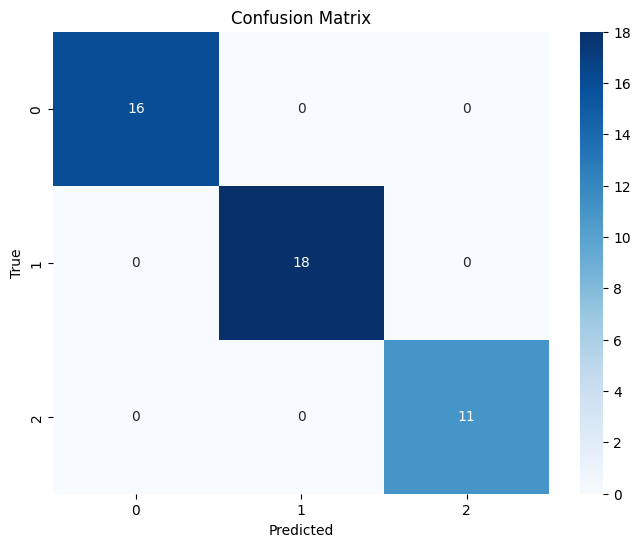

In [ ]:
cm=confusion_matrix(y_pred_logistic,y_test)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()